In [1]:
import numpy as np
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
hgt_dir = '../data/Hgt_500hPa_Jan80_Dec19.nc'
hgt_data = ca.read_netcdf(hgt_dir,2)

hgt : (480, 1, 73, 144)
lat : (73,)
level : (1,)
lon : (144,)
time : (480,)


In [3]:
lat = hgt_data['lat']
lon = hgt_data['lon'] - 180 

In [4]:
hgt_data['time'][0],hgt_data['time'][-1]

(cftime.DatetimeGregorian(1980, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeGregorian(2019, 12, 1, 0, 0, 0, 0))

In [5]:
hgt_dictionary = ca.clima_anom(hgt_data['hgt'][:,0,:,:])


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  40
Numbers of months:  480


In [6]:
hgt_summer = ca.season(hgt_dictionary,1)
hgt_autumn = ca.season(hgt_dictionary,2)
hgt_winter = ca.season(hgt_dictionary,3)
hgt_spring = ca.season(hgt_dictionary,4)

SUMMER Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)

AUTUMN climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)
WINTER Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)
SPRING Climatology

Climatology:  (73, 144)
Anomaly:  (39, 73, 144)


In [7]:
lon2d, lat2d = np.meshgrid(lon, lat)

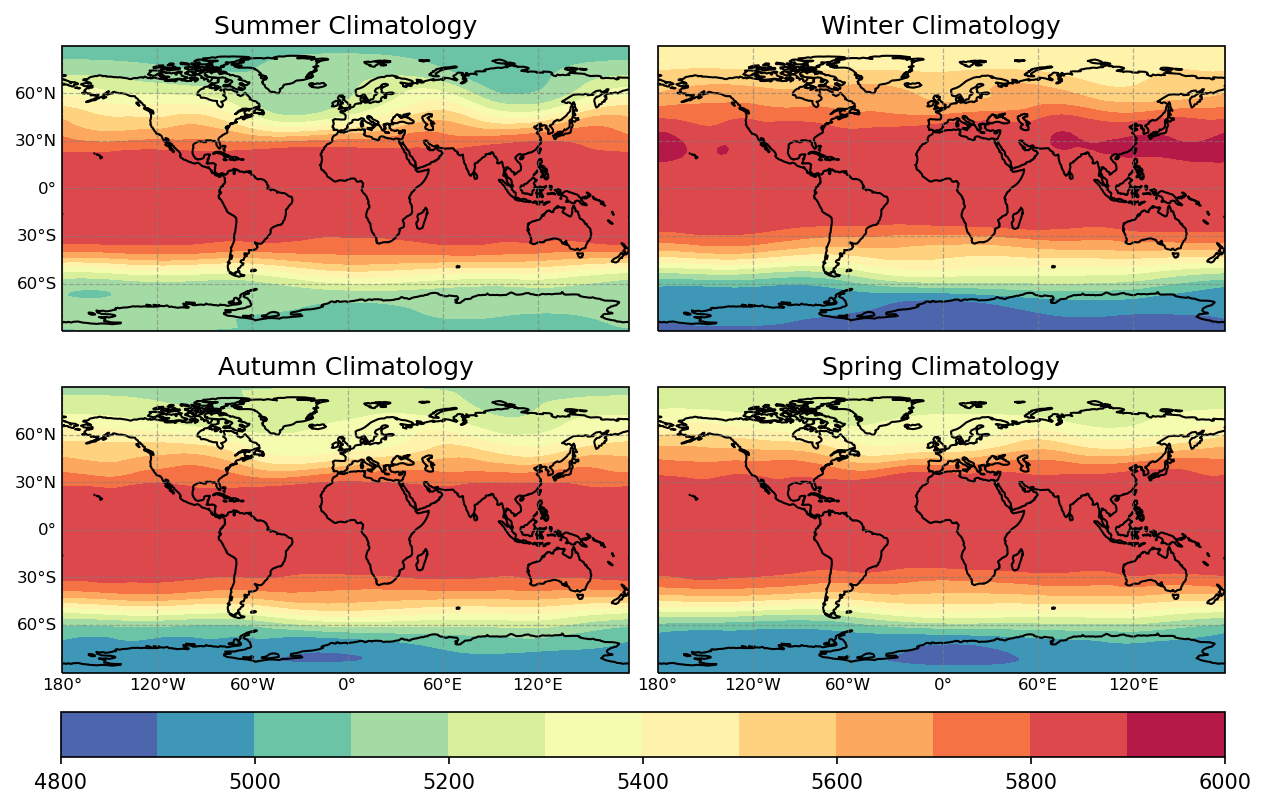

In [12]:
levels = np.arange(4800,6100,100)
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,6),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
a1 = ax1.contourf(lon2d, lat2d, hgt_summer[0],levels=levels,cmap=cmap)
ax1.title.set_text('Summer Climatology')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax2 = plt.subplot(gs[1, 0], projection = proj)
ax2.coastlines()
ax2.contourf(lon2d, lat2d, hgt_autumn[0],levels=levels,cmap=cmap)
ax2.title.set_text('Autumn Climatology')
gl = ax2.gridlines(crs = proj,draw_labels=False,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax3 = plt.subplot(gs[0, 1], projection = proj) 
ax3.coastlines()
ax3.contourf(lon2d, lat2d, hgt_winter[0],levels=levels,cmap=cmap)
ax3.title.set_text('Winter Climatology')
gl = ax3.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax4 = plt.subplot(gs[1, 1], projection = proj) 
ax4.coastlines()
ax4.contourf(lon2d, lat2d, hgt_spring[0],levels=levels,cmap=cmap)
ax4.title.set_text('Spring Climatology')
gl = ax4.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.01, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.06, 0.776, 0.05]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

plt.savefig('../fig/Monthly_Seasonal.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)